<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (38.8 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124015 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

# 단일 변수 선형 회귀 모델



$\hat{y}=\beta_0 + \beta_1x$



In [3]:
import numpy as np

## 선형 회귀 분석을 보이기 위한 임의의 데이터 생성

In [4]:
# 표준정규분포(평균=0, 분산=1인 정규분포)를 따르는 임의의 변수 100개를 생성
n = 100
np.random.seed(42)
x = np.random.normal(size=n)

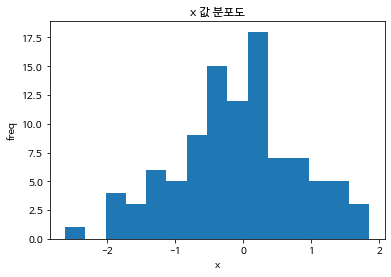

In [5]:
# x의 히스토그램 
plt.hist(x, bins=15)
plt.xlabel("x")
plt.ylabel("freq")
plt.title("x 값 분포도")
plt.show()

In [6]:
# 기울기가 beta_1, 절편이 beta_0 이고 표준편차를 0.2의 노이즈를 주어 y값을 생성
beta_0, beta_1, noise = 2.5, 3.2, 1.0
y = x * beta_1 + beta_0 + np.random.normal(scale=0.2, size=n)

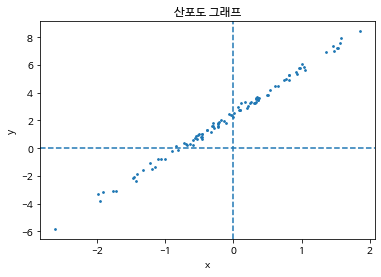

In [7]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3)
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프")
plt.show()

# 정규방정식(Ordinary Least Squares) - I

Ordinary Least Squares 방법으로,

임의로 생성한 데이터셋으로 단일변수 선형회귀모델을 학습시켜보자.

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})y_i}{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}$,  $\hat{\beta_0}=\bar{y} - \beta_1\bar{x}$

$\bar{x}=\frac{\sum\limits_{i=1}^{n}x_i}{n}$,  $\bar{y}=\frac{\sum\limits_{i=1}^{n}y_i}{n}$

In [8]:
x_bar = np.mean(x) # X의 평균을 구한다
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
beta_1 = np.sum(x_diff * y) / np.sum(np.square(x_diff)) # beta_1을 구한다.
beta_0 = np.mean(y) - beta_1 * np.mean(x) # beta_0를 구한다.
beta_0, beta_1

(2.5014855659727933, 3.1713485679457114)

In [9]:
# Tip: np.sum(x_diff * y)는 2번의 Vector 연산이 필요이를 dot을 사용하면 한 번으로 줄일 수 있다 .
beta_1 = np.dot(x_diff, y) / np.sum(np.square(x_diff)) 
beta_1

3.171348567945711

In [10]:
%%timeit
beta_1 = np.sum(x_diff * y) / np.sum(np.square(x_diff)) # beta_1을 구한다.

22.1 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%%timeit
# Tip: np.sum(x_diff * y)는 2번의 Vector 연산이 필요이를 dot을 사용하면 한 번으로 줄일 수 있다 .
beta_1 = np.dot(x_diff, y) / np.sum(np.square(x_diff)) 

7.06 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


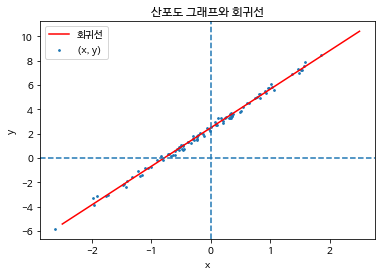

In [12]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
x_space = np.linspace(-2.5, 2.5, 10)
plt.plot(x_space, beta_0 + beta_1 * x_space, c='r', label='회귀선')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}$

In [14]:
x_bar = np.mean(x)
y_bar = np.mean(y)
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
y_diff = (y - y_bar) # x_i와 x_bar의 차이를 구한다.
beta_1 = np.sum(x_diff * y_diff) / np.sum(np.square(x_diff)) # beta_1을 구한다.
beta_1

3.17134856794571

# 정규방정식(Ordinary Least Squares) - II

In [ ]:
X = np.hstack([np.ones((n, 1)), np.expand_dims(x.T, axis= 1)])

In [ ]:
X.shape, X[:3]

((100, 2), array([[ 1.        ,  0.49671415],
        [ 1.        , -0.1382643 ],
        [ 1.        ,  0.64768854]]))

$\beta=(X^TX)^{-1}X^Ty$

In [ ]:
# Gram Matrix 구하기
Xt_by_X = np.matmul(X.T, X)
# Gram Matrix의 역행렬 구하기
inv_Xt_by_X = np.linalg.inv(Xt_by_X)
# XT_by_y 구하기 
XT_by_y = np.matmul(X.T, y)
# beta_hat 구하기
beta_hat = np.matmul(inv_Xt_by_X, XT_by_y)
beta_hat

array([2.50148557, 3.17134857])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.expand_dims(x, axis=-1), y)

LinearRegression()

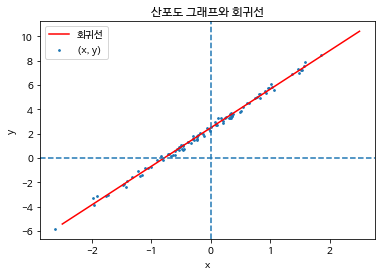

In [ ]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
plt.plot(np.linspace(-2.5, 2.5, 10), lr.predict(np.expand_dims(np.linspace(-2.5, 2.5, 10), -1)), c='r', label='회귀선')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()

In [ ]:
lr.coef_, lr.intercept_

(array([3.17134857]), 2.5014855659727933)